## LAB 12 : Imbalanced Classification Task

### Round 1

In [1]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
# Read that data into Python and call the dataframe churnData
churnData = pd.read_csv('DATA_Customer-Churn.txt',sep=',')

In [57]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [58]:
#Check the datatypes of all the columns in the data.You would see that the column TotalCharges is object type.
# Convert this column into numeric type using pd.to_numeric function.
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [59]:
churnData['TotalCharges']= pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [60]:
#Check for null values in the dataframe. Replace the null values
for i in churnData.columns:
    print(i, ':', churnData[i].isna().sum())

gender : 0
SeniorCitizen : 0
Partner : 0
Dependents : 0
tenure : 0
PhoneService : 0
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
TechSupport : 0
StreamingTV : 0
StreamingMovies : 0
Contract : 0
MonthlyCharges : 0
TotalCharges : 11
Churn : 0


In [61]:
meanC = churnData['TotalCharges'].mean()
churnData['TotalCharges'].fillna(meanC, inplace=True)

In [62]:
churnData['Churn'] = churnData['Churn'].replace({'Yes': 1, 'No': 0})

In [121]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
# Split the data into a training set and a test set.
# Scale the features either by using MinMaxScaler or a standard scaler.

X = churnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']].copy()
y = churnData['Churn'].copy()


In [129]:
X.loc[2348]

tenure              61.0
SeniorCitizen        0.0
MonthlyCharges      33.6
TotalCharges      2117.2
Name: 2348, dtype: float64

In [122]:
print('X.shape',X.shape)
print('y.shape',y.shape)

X.shape (7043, 4)
y.shape (7043,)


In [128]:
print('X.dtypes',X.dtypes)

X.dtypes tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('X_train.shape',X_train.shape)
print('X_test.shape',X_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)

X_train.shape (5282, 4)
X_test.shape (1761, 4)
y_train.shape (5282,)
y_test.shape (1761,)


In [110]:
# all features are numeric, so no need to split into _num and _cat
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns)

# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-0.340191,-0.435476,-0.514314,-0.462171
1,0.883210,2.296336,0.017840,0.555404
2,-1.196572,-0.435476,-0.819594,-0.950644
3,1.168670,-0.435476,-1.483535,-0.441989
4,-0.829552,-0.435476,0.658427,-0.539130


In [41]:
# (Optional) Encode the categorical variables so you can use them for modeling later.

### Round 2

In [139]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,confusion_matrix)

def evaluate_model(note, model, X_test, y_test, results):
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    true_positives = conf_matrix[0][0]
    false_positives = conf_matrix[0][1]
    false_negatives = conf_matrix[1][0]
    true_negatives = conf_matrix[1][1]
    new_result = pd.DataFrame({'note':note,'accuracy':score,'precision':precision,'recall':recall,'f1_score':f1,'true_positives':true_positives,'false_positives':false_positives,'false_negatives':false_negatives,'true_negatives':true_negatives},index=[0])
    print(confusion_matrix(y_test, pred))
    return pd.concat([results,new_result],axis=0)
results = pd.DataFrame(columns=['note','accuracy','precision','recall','f1_score', 'true_positives','false_positives','false_negatives','true_negatives'])

In [112]:
# (Optional) Fit a logistic Regression model on the training data
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7830777967064169

In [113]:
results = evaluate_model('Round 2: LR C:' + str(LR.get_params()['C']) , LR, X_test_scaled, y_test, results)
results

[[1167  131]
 [ 251  212]]


,note,accuracy,precision,recall,f1_score,true_positives,false_positives,false_negatives,true_negatives
0,Round 2: LR C:1.0,0.783078,0.618076,0.457883,0.526055,1167,131,251,212


In [114]:
# Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.
from sklearn.neighbors import KNeighborsClassifier

KnnClass = KNeighborsClassifier(n_neighbors=3)
KnnClass.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [115]:
results = evaluate_model('Round 2 KNeighborsClassifier', KnnClass, X_test_scaled, y_test, results)
results

[[1111  187]
 [ 254  209]]


c:\Users\romai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\romai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,note,accuracy,precision,recall,f1_score,true_positives,false_positives,false_negatives,true_negatives
0,Round 2: LR C:1.0,0.783078,0.618076,0.457883,0.526055,1167,131,251,212
0,Round 2 KNeighborsClassifier,0.749574,0.527778,0.451404,0.486612,1111,187,254,209


In [116]:
# Fit a Decision Tree Classifier on the training data.
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [117]:
results = evaluate_model('Round 2 DecisionTreeClassifier', DTC, X_test_scaled, y_test, results)
results

[[1044  254]
 [ 255  208]]


,note,accuracy,precision,recall,f1_score,true_positives,false_positives,false_negatives,true_negatives
0,Round 2: LR C:1.0,0.783078,0.618076,0.457883,0.526055,1167,131,251,212
0,Round 2 KNeighborsClassifier,0.749574,0.527778,0.451404,0.486612,1111,187,254,209
0,Round 2 DecisionTreeClassifier,0.710960,0.450216,0.449244,0.449730,1044,254,255,208


### Round 3

In [141]:
#apply K-fold cross validation on your models built before,  and check the model score. Note: So far we have not balanced the data. 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


KF = KFold(n_splits=3)
KF.get_n_splits(X)

for i, (train_index, test_index) in enumerate(KF.split(X)):
    # Split the data into training and test sets
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
   
    LR = LogisticRegression(random_state=0, solver='lbfgs')
    LR.fit(X_train_kf, y_train_kf)
    results = evaluate_model('Round 3: LR+KF i:' + str(i) , LR, X_test, y_test, results)

    KnnClass = KNeighborsClassifier(n_neighbors=3)
    KnnClass.fit(X_train_kf, y_train_kf)
    results = evaluate_model('Round 3: KnnClass+KF i:' + str(i), KnnClass, X_test, y_test, results)

    DTC = DecisionTreeClassifier()
    DTC.fit(X_train_kf, y_train_kf)
    results = evaluate_model('Round 3: DTC+KF i:' + str(i), DTC, X_test, y_test, results)
    




[[1164  134]
 [ 251  212]]
[[1171  127]
 [ 194  269]]
[[1211   87]
 [  90  373]]
[[1170  128]
 [ 256  207]]
[[1162  136]
 [ 203  260]]
[[1222   76]
 [  94  369]]


c:\Users\romai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\romai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[[1177  121]
 [ 256  207]]
[[1177  121]
 [ 195  268]]
[[1217   81]
 [  87  376]]


c:\Users\romai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\romai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [142]:
results

,note,accuracy,precision,recall,f1_score,true_positives,false_positives,false_negatives,true_negatives
0,Round 3: LR+KF i:0,0.781374,0.612717,0.457883,0.524104,1164,134,251,212
0,Round 3: KnnClass+KF i:0,0.817717,0.679293,0.580994,0.626310,1171,127,194,269
0,Round 3: DTC+KF i:0,0.900625,0.814410,0.805616,0.809989,1213,85,90,373
0,Round 3: LR+KF i:1,0.781942,0.617910,0.447084,0.518797,1170,128,256,207
0,Round 3: KnnClass+KF i:1,0.807496,0.656566,0.561555,0.605355,1162,136,203,260
0,Round 3: DTC+KF i:1,0.903464,0.820569,0.809935,0.815217,1216,82,88,375
0,Round 3: LR+KF i:2,0.785917,0.631098,0.447084,0.523388,1177,121,256,207
0,Round 3: KnnClass+KF i:2,0.820557,0.688946,0.578834,0.629108,1177,121,195,268
0,Round 3: DTC+KF i:2,0.903464,0.824834,0.803456,0.814004,1219,79,91,372
0,Round 3: LR+KF i:0,0.781374,0.612717,0.457883,0.524104,1164,134,251,212


### Round 4

In [143]:
#fit a Random forest Classifier on the data and compare the accuracy.
from sklearn.ensemble import RandomForestClassifier

In [144]:
RFC = RandomForestClassifier(n_estimators=10)
RFC.fit(X, y)

RandomForestClassifier(n_estimators=10)

In [147]:
results = evaluate_model('Round 4: RFC n=10', RFC, X_test, y_test, results)
results

[[1276   22]
 [  42  421]]


,note,accuracy,precision,recall,f1_score,true_positives,false_positives,false_negatives,true_negatives
0,Round 3: LR+KF i:0,0.781374,0.612717,0.457883,0.524104,1164,134,251,212
0,Round 3: KnnClass+KF i:0,0.817717,0.679293,0.580994,0.626310,1171,127,194,269
0,Round 3: DTC+KF i:0,0.900625,0.814410,0.805616,0.809989,1213,85,90,373
0,Round 3: LR+KF i:1,0.781942,0.617910,0.447084,0.518797,1170,128,256,207
0,Round 3: KnnClass+KF i:1,0.807496,0.656566,0.561555,0.605355,1162,136,203,260
0,Round 3: DTC+KF i:1,0.903464,0.820569,0.809935,0.815217,1216,82,88,375
0,Round 3: LR+KF i:2,0.785917,0.631098,0.447084,0.523388,1177,121,256,207
0,Round 3: KnnClass+KF i:2,0.820557,0.688946,0.578834,0.629108,1177,121,195,268
0,Round 3: DTC+KF i:2,0.903464,0.824834,0.803456,0.814004,1219,79,91,372
0,Round 3: LR+KF i:0,0.781374,0.612717,0.457883,0.524104,1164,134,251,212


In [159]:
#tune the hyper parameters with Gridsearch and check the results. retrain the final mode with the best parameters found.
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[1, 10, 15, 18, 20, 22, 25, 30, 40, 50, 75, 100, 200]}

GSCV = GridSearchCV(estimator=RFC,param_grid=parameters, n_jobs=-1, verbose=True)
GSCV.fit(X, y)



Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(estimator=RandomForestClassifier(n_estimators=10), n_jobs=-1,
             param_grid={'n_estimators': [1, 10, 15, 18, 20, 22, 25, 30, 40, 50,
                                          75, 100, 200]},
             verbose=True)

In [160]:
GSCV.best_estimator_

RandomForestClassifier(n_estimators=30)

In [163]:
GSCV.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [176]:
GSCV.cv_results_['mean_test_score'][7]

0.7677128363120203

### Managing imbalance in the dataset

<AxesSubplot:>

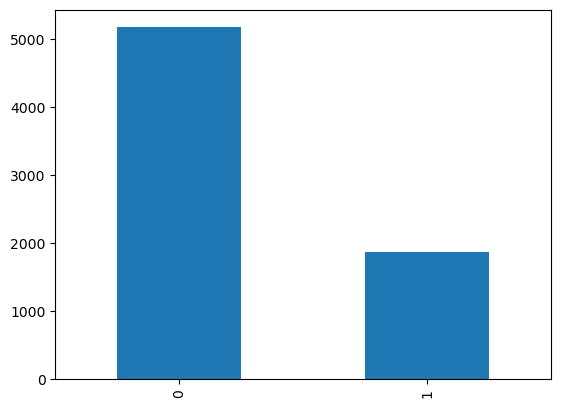

In [177]:
#Check for the imbalance
count_classes = churnData['Churn'].value_counts()
count_classes.plot(kind = 'bar')

In [192]:
#Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes
from sklearn.utils import resample
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()


,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,-0.340191,-0.435476,-0.514314,-0.462171,0.0
1,0.883210,2.296336,0.017840,0.555404,NaN
2,-1.196572,-0.435476,-0.819594,-0.950644,1.0
3,1.168670,-0.435476,-1.483535,-0.441989,0.0
4,-0.829552,-0.435476,0.658427,-0.539130,1.0


In [193]:
train.dropna(inplace=True)

In [194]:
# separate majority/minority classes
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [195]:
display(no_churn.shape)
display(yes_churn.shape)

(2924, 5)

(1041, 5)

In [196]:
# oversample minority
yes_dchurn_oversampled = resample(yes_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_churn),#<- make both sets the same size
                                    random_state=0)

In [197]:
# both sets are now of a reasonable size
display(no_churn.shape)
display(yes_dchurn_oversampled.shape)

(2924, 5)

(2924, 5)

In [198]:
train_oversampled = pd.concat([no_churn,yes_dchurn_oversampled],axis=0)

In [199]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [206]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of diabetes

RFC = RandomForestClassifier(n_estimators=30)
RFC.fit(X_train_over, y_train_over)

pred = RFC.predict(X_train_over)



In [207]:
results = evaluate_model('Round 4: RFC over', RFC, X_test, y_test, results)
results

[[ 242 1056]
 [ 188  275]]


,note,accuracy,precision,recall,f1_score,true_positives,false_positives,false_negatives,true_negatives
0,Round 3: LR+KF i:0,0.781374,0.612717,0.457883,0.524104,1164,134,251,212
0,Round 3: KnnClass+KF i:0,0.817717,0.679293,0.580994,0.626310,1171,127,194,269
0,Round 3: DTC+KF i:0,0.900625,0.814410,0.805616,0.809989,1213,85,90,373
0,Round 3: LR+KF i:1,0.781942,0.617910,0.447084,0.518797,1170,128,256,207
0,Round 3: KnnClass+KF i:1,0.807496,0.656566,0.561555,0.605355,1162,136,203,260
0,Round 3: DTC+KF i:1,0.903464,0.820569,0.809935,0.815217,1216,82,88,375
0,Round 3: LR+KF i:2,0.785917,0.631098,0.447084,0.523388,1177,121,256,207
0,Round 3: KnnClass+KF i:2,0.820557,0.688946,0.578834,0.629108,1177,121,195,268
0,Round 3: DTC+KF i:2,0.903464,0.824834,0.803456,0.814004,1219,79,91,372
0,Round 3: LR+KF i:0,0.781374,0.612717,0.457883,0.524104,1164,134,251,212


In [208]:
# undersample majority
no_churn_undersampled = resample(no_churn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_churn),
                                    random_state=0)

In [209]:
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1041, 5)

(1041, 5)

In [210]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled])
train_undersampled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
2,-1.196572,-0.435476,-0.819594,-0.950644,1.0
4,-0.829552,-0.435476,0.658427,-0.539130,1.0
5,1.046330,-0.435476,0.503285,0.997090,1.0
13,-1.237352,-0.435476,0.199673,-0.945903,1.0
18,1.291010,-0.435476,-1.485203,-0.442454,1.0


In [213]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [214]:
RFC = RandomForestClassifier(n_estimators=30)
RFC.fit(X_train_under, y_train_under)

pred = RFC.predict(X_train_under)

In [215]:
results = evaluate_model('Round 4: RFC under', RFC, X_test, y_test, results)
results

[[   7 1291]
 [  19  444]]


,note,accuracy,precision,recall,f1_score,true_positives,false_positives,false_negatives,true_negatives
0,Round 3: LR+KF i:0,0.781374,0.612717,0.457883,0.524104,1164,134,251,212
0,Round 3: KnnClass+KF i:0,0.817717,0.679293,0.580994,0.626310,1171,127,194,269
0,Round 3: DTC+KF i:0,0.900625,0.814410,0.805616,0.809989,1213,85,90,373
0,Round 3: LR+KF i:1,0.781942,0.617910,0.447084,0.518797,1170,128,256,207
0,Round 3: KnnClass+KF i:1,0.807496,0.656566,0.561555,0.605355,1162,136,203,260
0,Round 3: DTC+KF i:1,0.903464,0.820569,0.809935,0.815217,1216,82,88,375
0,Round 3: LR+KF i:2,0.785917,0.631098,0.447084,0.523388,1177,121,256,207
0,Round 3: KnnClass+KF i:2,0.820557,0.688946,0.578834,0.629108,1177,121,195,268
0,Round 3: DTC+KF i:2,0.903464,0.824834,0.803456,0.814004,1219,79,91,372
0,Round 3: LR+KF i:0,0.781374,0.612717,0.457883,0.524104,1164,134,251,212
